In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Unit 03 Practice

Unit 03 of our course is on *dynamic modeling*. A **dynamic model** is a mathematical description of how a quantity changes in time based on a theory of what factors affect those changes.

The fundamental idea behind dynamic models is:

$$\mathrm{future\ value} = \mathrm{value\ now} + \mathrm{predicted\ change}$$

Often a model includes *approximations* (or constraints). And often a model is used to make predictions which are compared to experimental measurements. When a model predicts experimental measurements, it gives us confidence that we understand the theory behind the model.

The model oftens describes the rate of change in a value. In this case, the *predicted change* in a value is its *rate of change* times a time interval.

$$\mathrm{predicted\ change} = \mathrm{(rate\ of\ change)*(time\ interval)}$$

Putting this together, we have

$$\mathrm{future\ value} = \mathrm{value\ now} + \mathrm{(rate\ of\ change)*(time\ interval)}$$


## Exercise 1

You purchase a $\$250,000$ home with 4% annual interest that is compounded monthly.

1. What should be your monthly payment in order to pay it off in 30 years?
2. What should be your monthly payment in order to pay it off in 15 years?
3. How much do you save (in total, including the principal of the loan and interest) by using a 15-year loan?

## Exercise 2

[Source: NCSLP](http://shodor.org/ncslp/talks/basicstella/sld009.htm)

In 1978, a study was conducted and reported in the British Medical Journal of an outbreak of the influenza virus in a boys boarding school. The school had a population of 763 boys. Of these, 512 were confined to bed at some point during the epidemic, which lasted Jan. 22 - Feb. 4, 1978. The epidemic started with one infected boy. At the outbreak of the epidemic, none of the boys had previously had influenza, so none had immunity.

Therefore, this situation fits the simplistic assumptions of the SIR model.

Let's use the following values for initial conditions, recovery rate, and transmission constant. The unit of time is one day. The total population $N$ is 763 boys.

Variable or Constant | Value (in appropriate units)
--- | ---
S | 762
I | 1
R | 0
recovery rate, $r_{R,I}$ | 0.5; this is $\dfrac{1}{2\ days}$ where 2 days is the recovery time
transmission constant, $r_{S,I}$ | 0.00218

The program below computes the time-evolution of the SIR populations. Run the program and view the output.

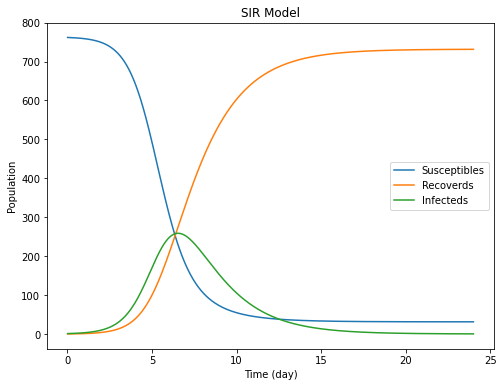

In [18]:
t = 0
dt = 0.01 #unit is day

N = 763
S = 762
I = 1
R = 0

r_SI = 0.00218
r_RI = 0.5

tmodel = []
Smodel = []
Imodel = []
Rmodel = []

while t < 24:
    
    Srate = -r_SI*S*I
    Rrate = r_RI*I
    Irate = -Srate + -Rrate
    
    S = S + Srate*dt
    R = R + Rrate*dt
    I = I + Irate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Smodel.append(S)
    Rmodel.append(R)
    Imodel.append(I)
    
fig = plt.figure(figsize=(8,6))
plt.title("SIR Model")
plt.xlabel("Time (day)")
plt.ylabel("Population")
plt.plot(tmodel, Smodel, label='Susceptibles')
plt.plot(tmodel, Rmodel, label='Recoverds')
plt.plot(tmodel, Imodel, label='Infecteds')
plt.legend()
plt.show()


Starting with the program above, do Project 1 on of Module 4.3 of *Introduction to Computational Science* on pg. 143.

## Exercise 3

The transmission coefficient, `r_SI` in the program above, assumes that the frequency of interaction and probability of transmission are constant. However, these factors can vary in time as policies are instituted and followed by the population. Or there can be seasonal changes. For example, during Winter, people are more often indoors, more often interacting closely, and more often touching common surfaces.

1. In this exercise, we will predict what happens when `r_SI` changes with time. If it changes with time, should it be calculated before the loop or inside the loop? Explain your answer with reasoning.
2. Using a constant transmission coefficient of `r_SI = 0.00218`, what percentage of the population of the boys' school was originally infected (and recovered)? (The starting code for modeling the boys school is already pasted below.)
3. Suppose that after 1/4 of the susceptibles have been infected, the transmission coefficient `r_SI` is changed to one-half its original value, due to improved hygiene and social distancing. What percentage of the population of the boys' school will be infected (and recovered)? (You can modify the code below.)


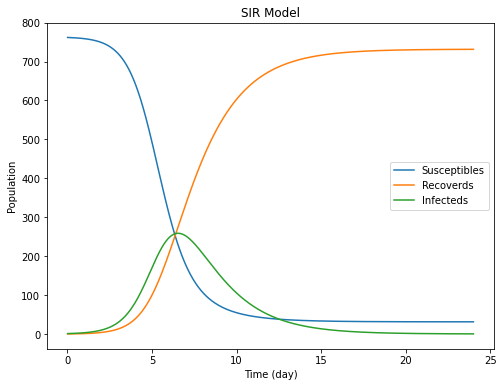

In [28]:
t = 0
dt = 0.01 #unit is day

N = 763
S = 762
I = 1
R = 0

r_SI = 0.00218
r_RI = 0.5

tmodel = []
Smodel = []
Imodel = []
Rmodel = []

while t < 24:
    
    Srate = -r_SI*S*I
    Rrate = r_RI*I
    Irate = -Srate + -Rrate
    
    S = S + Srate*dt
    R = R + Rrate*dt
    I = I + Irate*dt
    
    t = t + dt
    
    tmodel.append(t)
    Smodel.append(S)
    Rmodel.append(R)
    Imodel.append(I)
    
fig = plt.figure(figsize=(8,6))
plt.title("SIR Model")
plt.xlabel("Time (day)")
plt.ylabel("Population")
plt.plot(tmodel, Smodel, label='Susceptibles')
plt.plot(tmodel, Rmodel, label='Recoverds')
plt.plot(tmodel, Imodel, label='Infecteds')
plt.legend()
plt.show()


## Exercise 4

Suppose $\$5,000$ is deposited into an account which compounds daily and grows at a constant rate. Suppose that after 4 years the account is worth $\$7,000$.

1. What is the annual percentage growth rate?
2. How much is the account worth after 5 years?
3. How many years does it take for the balance to double?

## Exercise 5

The position of an object on a one-dimensional axis (number line) is $x$. This could be a person on a football field or a runner on the straight part of a track or the height of a ball above the ground, for example. The rate of change of $x$ is called the *x-velocity*, $v_x$, of the object.

$$rate = \frac{\Delta x}{\Delta t}=v_x$$

So the x-position changes an amount 

$$\Delta x = v_x\Delta t$$ 

in a time interval $\Delta t$. And we can predict the new position of the object at a later time using

$$x_{future} = x_{now} + v_x\Delta t$$

1. On a straight track, $x=0$ is defined to be the starting line. A runner starts at $x=0$ and runs with an x-velocity of 8 m/s. Using a loop with a time step of 0.1 s, calculate and plot the x-position of the runner as a function of time for 10 s.

2. A second runner starts at $x=20$ m at $t=0$ and runs with an x-velocity of 5 m/s. Calculate and plot $x$ vs. $t$ for both runners on the same axes.

3. At approximately what time and position does the first runner pass the second runner?